# 1, 2 задание

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('winequality-white.csv')
df

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# 3 Задание

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import math

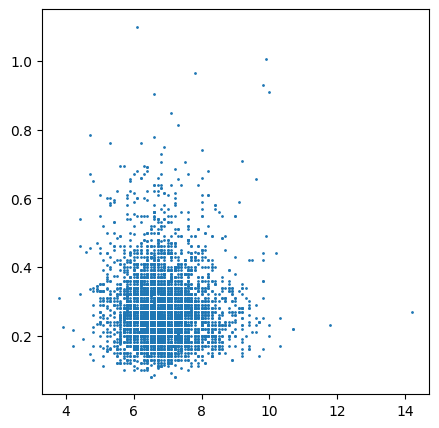

In [4]:
#pd.set_option('display.max_colums' , 2000)
#pd.set_option('display.width' , 2000)

fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(df['FixedAcidity'], df['VolatileAcidity'], s = 1)
plt.show()

### Поскольку точки расположены не по всей площади точечной диаграммы, то нужно использовать МГК

### Строим предиктивный эллипс

In [7]:
x = df['Alcohol'] 
y = df['ResidualSugar']

In [8]:
def confidence_ellipse(x, y, ax, p_value, facecolor='none', **kwargs):
    
    if x.size != y.size:
        raise ValueError("x и y должны быть одинакового размера")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])

    #получение собственных чисел
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    #масштабирование согласно стандартному отклонению и p-value
    if p_value > 0 and p_value < 1:
        n_std = math.sqrt(-2 * math.log(p_value))
    else:
        print('P-value должно быть в интервале от 0 до 1')
    
    #находим масштаб по x и y:
    # x
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # y
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    #Преобразование координат, согласно полученным значениям
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

#### Значения ставим 0,1; 0,05; 0,01.

In [13]:
def ell(procent):
    fig, ax = plt.subplots(figsize = (8, 8))
    confidence_ellipse(x, y, ax, procent, edgecolor='red')
    ax.scatter(x, y, s = 2)
    plt.show()

90%-предиктивный эллипс


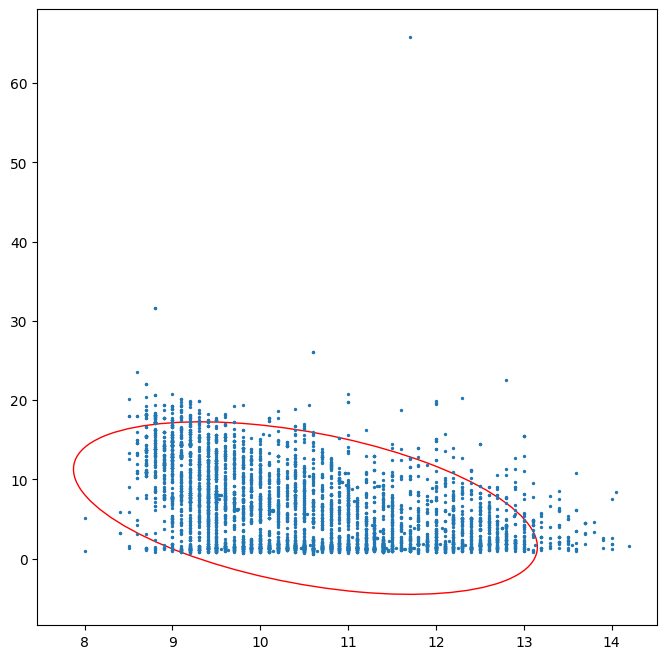

95%-предиктивный эллипс


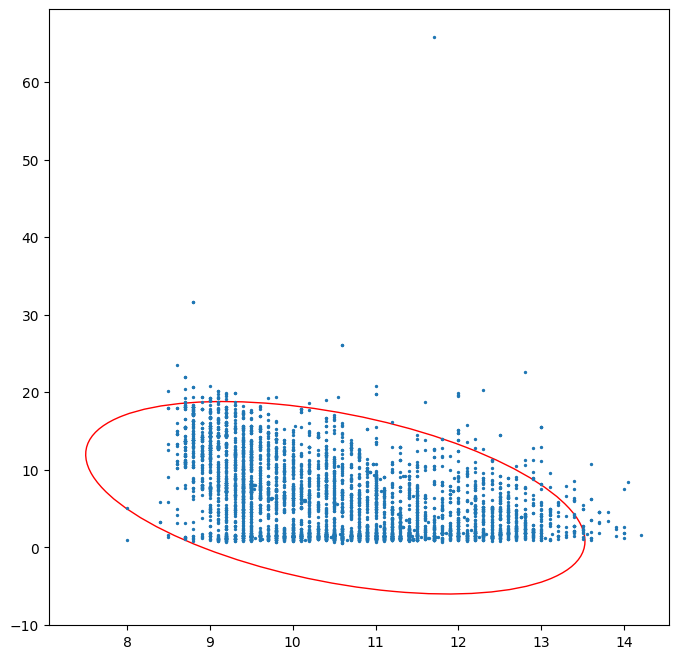

99%-предиктивный эллипс


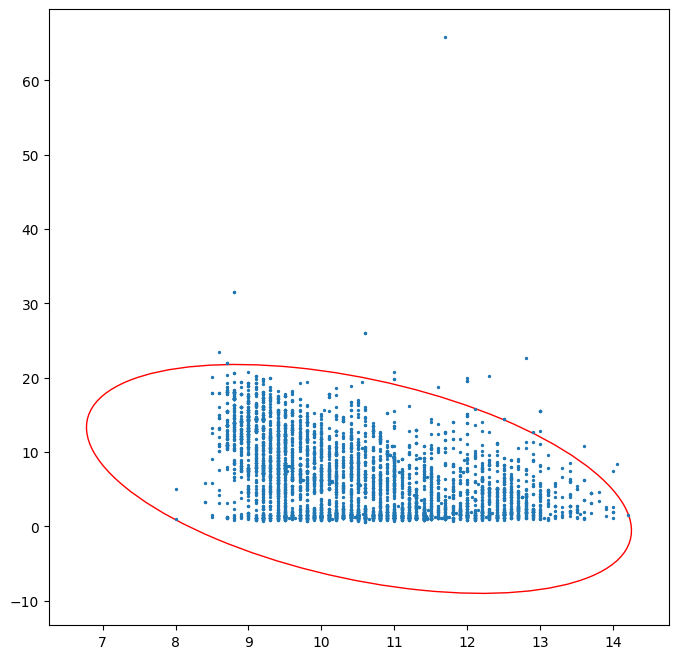

99,9999%-предиктивный эллипс


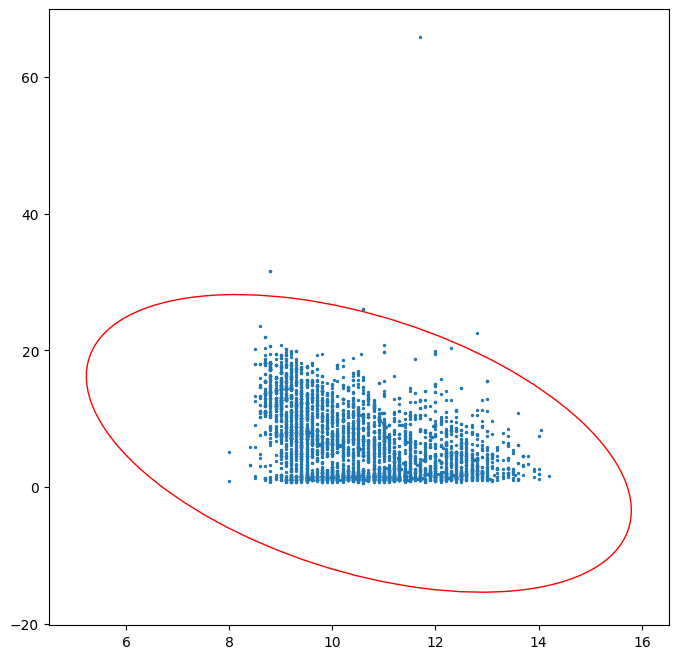

In [36]:
print("90%-предиктивный эллипс")
ell(0.1)
print("95%-предиктивный эллипс")
ell(0.05)
print("99%-предиктивный эллипс")
ell(0.01)
print("99,9999%-предиктивный эллипс")
ell(0.0001)

# 4 Задание

#### Стандартизация данных

In [17]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [18]:
df1 = df.iloc[:, :-1]

scaler = StandardScaler()
df1 = scaler.fit_transform(df1)
df1

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

# 5 Задание

#### Рассчет главных компонент

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 11)
df_train = pca.fit_transform(df1)

#### Матрица ковариаций

In [20]:
cov = pca.get_covariance()
print(cov)

[[ 1.00020421e+00 -2.27019251e-02  2.89239750e-01  8.90388800e-02
   2.30903579e-02 -4.94059460e-02  9.10883532e-02  2.65385196e-01
  -4.25945254e-01 -1.71464857e-02 -1.20905808e-01]
 [-2.27019251e-02  1.00020421e+00 -1.49502334e-01  6.42991877e-02
   7.05259704e-02 -9.70317498e-02  8.92787311e-02  2.71193823e-02
  -3.19218856e-02 -3.57354428e-02  6.77317712e-02]
 [ 2.89239750e-01 -1.49502334e-01  1.00020421e+00  9.42308629e-02
   1.14387802e-01  9.40964322e-02  1.21155533e-01  1.49533100e-01
  -1.63781650e-01  6.23436687e-02 -7.57441944e-02]
 [ 8.90388800e-02  6.42991877e-02  9.42308629e-02  1.00020421e+00
   8.87026459e-02  2.99159432e-01  4.01521288e-01  8.39137777e-01
  -1.94173097e-01 -2.66698109e-02 -4.50723244e-01]
 [ 2.30903579e-02  7.05259704e-02  1.14387802e-01  8.87026459e-02
   1.00020421e+00  1.01413057e-01  1.98950918e-01  2.57263845e-01
  -9.04579243e-02  1.67663068e-02 -3.60262265e-01]
 [-4.94059460e-02 -9.70317498e-02  9.40964322e-02  2.99159432e-01
   1.01413057e-01  

#### Матрица преобразования

In [23]:
[en, ev] = np.linalg.eig(cov)
print("Собственные значения:")
print(en)
print("Матрица преобразования:")
print(ev)

Собственные значения:
[3.2229119  0.0206533  1.57556161 0.28954625 0.41422824 1.22192081
 0.59948087 0.7267464  0.93893321 0.97353334 1.01873034]
Матрица преобразования:
[[-0.15721845  0.17129048  0.58755821  0.1317053  -0.33052283  0.1213683
  -0.58835527  0.19784897 -0.10353073  0.25104839 -0.01858383]
 [-0.00508949  0.01705666 -0.05172805  0.22372176  0.14590968 -0.5909715
  -0.02837266 -0.26935495  0.1223385   0.64261658 -0.27411517]
 [-0.14404984  0.00972112  0.34529456  0.03735137  0.20201133  0.50439688
   0.15228698 -0.70548123  0.13209669  0.0539051  -0.14851432]
 [-0.42740837  0.49022593 -0.00874939 -0.09446795 -0.40896853 -0.21431987
   0.38818585 -0.21275955 -0.28944693  0.01139144  0.27376531]
 [-0.21201106  0.02539945  0.00880031 -0.05337405 -0.39353539 -0.10236744
   0.10015094  0.07948377  0.39582111 -0.32862831 -0.71071228]
 [-0.30033439 -0.03090844 -0.29035514  0.56745057 -0.14407339  0.27941005
   0.08179901  0.16677879  0.49449355  0.17691226  0.30558549]
 [-0.40665

#### Матрица преобразования через МГК

In [25]:
comp = pca.components_
explained_variance = pca.explained_variance_
print("Собственные значения:")
print(explained_variance)
print("Матрица преобразования:")
print(comp)
# print("Матрица поворота:")
# print(comp.T)

Собственные значения:
[3.2229119  1.57556161 1.22192081 1.01873034 0.97353334 0.93893321
 0.7267464  0.59948087 0.41422824 0.28954625 0.0206533 ]
Матрица преобразования:
[[ 0.15721845  0.00508949  0.14404984  0.42740837  0.21201106  0.30033439
   0.4066522   0.5115236  -0.12883188  0.04337933 -0.43723783]
 [-0.58755821  0.05172805 -0.34529456  0.00874939 -0.00880031  0.29035514
   0.24403239  0.0062968   0.5813444   0.22269537 -0.03556867]
 [ 0.1213683  -0.5909715   0.50439688 -0.21431987 -0.10236744  0.27941005
   0.12437527 -0.12920286  0.1266715   0.43324404  0.10590316]
 [ 0.01858383  0.27411517  0.14851432 -0.27376531  0.71071228 -0.30558549
  -0.06045562 -0.0220611   0.09775335  0.44205953 -0.1410787 ]
 [ 0.25104839  0.64261658  0.0539051   0.01139144 -0.32862831  0.17691226
   0.29300991 -0.08458824 -0.11982553  0.40058526  0.33741948]
 [-0.10353073  0.1223385   0.13209669 -0.28944693  0.39582111  0.49449355
   0.27631988 -0.32765091 -0.19334116 -0.4810392   0.13928416]
 [-0.197

# 6 Задание

#### Оценка информативности координат

In [26]:
#print(en)
en_sorted = sorted(en, reverse = True)
print("Собственные значения:")
print(en_sorted)
print("Уровень информативности:")
en_r = en_sorted / en.sum()
print(en_r)

# explained_variance_ratio = pca.explained_variance_ratio_
# print(explained_variance_ratio_)

Собственные значения:
[3.2229118963276027, 1.575561605561277, 1.2219208132743893, 1.0187303437157493, 0.9735333410659246, 0.9389332086986261, 0.7267463991023946, 0.5994808726345684, 0.41422823663926067, 0.289546253770136, 0.020653302438582363]
Уровень информативности:
[0.29293217 0.14320363 0.11106103 0.09259294 0.08848496 0.08534014
 0.06605437 0.05448713 0.03764942 0.02631701 0.00187719]


### Координата PC1 - это 29% изменчивости данных, координата PC2 - это 14% изменчивости данных, для координаты PC3 - 11%; для координаты PC4 - 9% 
### Это значит, что перейдя от 11 координат к первым 4, потеряем: 100% - (29+14+11+9) % = 37% значений

In [31]:
sum = en_r[0]
for i in range(1, 10):
    if (sum < 0.95):
        sum += en_r[i]
    else:
        print('Достаточно', i, 'главных компонент для информативности 95%')

Достаточно 9 главных компонент для информативности 95%


# 7 Задание

### Метод Кайзера

In [32]:
m = 0
for i in range(0, 10):
    if (en_sorted[i] >= 1):
        m += 1
    else:
        break
        
print(f'Значения больше 1 имеют {m} главных компонент')

Значения больше 1 имеют 4 главных компонент
